# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [40]:
#(1)
import pandas as pd
import numpy as np
df = pd.read_csv('/content/airbnb_hw.csv',low_memory=False) #not sure if this is too big to load . . .
print(df.dtypes, '\n')
print(df['Price'].unique(),'\n')
#removes commas
df['Price_clean'] = (
    df['Price']
    .str.replace(',', '', regex=False)
    .astype(float)
)
#converts object to numeric so they are actually NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
#dummy var
df['Price_clean_na'] = df['Price_clean'].isna()
print("After cleaning:\n", df['Price_clean'].describe())
print("Total missing prices:", df['Price_clean_na'].sum())
print("Proportion missing:", df['Price_clean_na'].mean())

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' 

To clean this data I removed the commas in the numbers after they are over 999. I also created a dummy variable for Price_clean_nan to make all blank values nan. There were no nan values so I did not have to impute. There were 0 missing values.

response_datetime     object
problem               object
is_911_call           object
primary_offense       object
subject_injury        object
force_type            object
force_type_action     object
race                  object
sex                   object
age                  float64
type_resistance       object
precinct               int64
neighborhood          object
dtype: object 

[nan 'No' 'Yes'] 

After coercion: 
 count     3077
unique       2
top        Yes
freq      1631
Name: subject_injury, dtype: object 

Total Missings: 
 9848 



subject_injury_nan,False,True
force_type,,
Baton,0.500000,0.500000
Bodily Force,0.252280,0.747720
Chemical Irritant,0.107972,0.892028
Firearm,1.000000,0.000000
Gun Point Display,0.740385,0.259615
Improvised Weapon,0.500000,0.500000
Less Lethal,0.000000,1.000000
Less Lethal Projectile,1.000000,0.000000
Maximal Restraint Technique,0.000000,1.000000


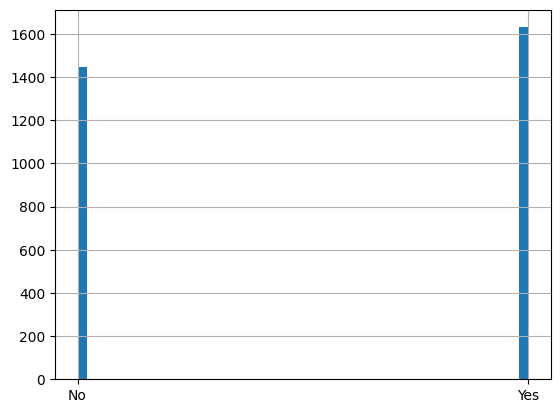

In [43]:
# (2)
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd # Import the pandas package into your workspace
df = pd.read_csv('/content/mn_police_use_of_force.csv', low_memory=False) #not sure if this is too big to load . . .
print(df.dtypes, '\n')
print(df['subject_injury'].unique(),'\n')
df['subject_injury_nan'] = df['subject_injury'].isnull() #creates a dummy missing variable to put all the missing values
print('After coercion: \n', df['subject_injury'].describe(),'\n') # Describe the numeric variable
df['subject_injury'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['subject_injury_nan']),'\n') # #9848 are missing this is ~3/4ths of the data (76%)
#calculate proportion missing
prop_missing = df['subject_injury_nan'].mean()
prop_missing

#cross-tab
pd.crosstab(
    df['force_type'],
    df['subject_injury_nan'],
    normalize='index'
)


Approximately 76% (~3/4) of the subject_injury values are missing this is a concern because that means that injury outcomes are unavailable for the majority of these incidents.


This suggests that for low-severity or "control" type of forces that subject injury data is always missing. For more aggressive alternatives such as firearms there is never subject injury data missing, neither is there for less lethal projectile. Further moderate force types such as baton, bodily force, taser are in the middle.

In [48]:
#(3)
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd # Import the pandas package into your workspace
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
print(df.dtypes, '\n')
print(df['WhetherDefendantWasReleasedPretrial'].unique(),'\n')

#clean the data
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
#create dummy var
df['WhetherDefendantWasReleasedPretrial_nan'] = df['WhetherDefendantWasReleasedPretrial'].isnull()
#creates a dummy missing variable to put all the missing values
print('After coercion: \n', df['WhetherDefendantWasReleasedPretrial'].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df['WhetherDefendantWasReleasedPretrial_nan']),'\n')
df['WhetherDefendantWasReleasedPretrial_clean'] = df['WhetherDefendantWasReleasedPretrial_clean'].replace({
    0: 'No',
    1: 'Yes'
})

InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object 

[9 0 1] 

After coercion: 
 count    22955.000000
mean         0.834415
std          0.371716
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max     

To clean this data saw that the unique values were 0,1,9. In this way we know that the 9 means the data is missing. I converted each value of 9 to a value of np.nan to clean the data. There were 31 data points that were missing "WhetherDefendantWasReleasedPretrial." The 0's and 1's represent no and yes respectively and could also get converted into categorical vars.

In [52]:
#(4)
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd # Import the pandas package into your workspace
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
print(df.dtypes, '\n')
print(df['ImposedSentenceAllChargeInContactEvent'].unique(),'\n')



#converts to numeric
df['ImposedSentenceAllChargeInContactEvent_clean'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce') #turned Price to a numeric variable because it was read as an object

#structural missing, when the sentence type is 4
df.loc[
    df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4,
    'ImposedSentenceAllChargeInContactEvent'
] = 'No sentence imposed'

#now that its numeric blank values are NaN
df['ImposedSentenceAllChargeInContactEvent_nan'] = df['ImposedSentenceAllChargeInContactEvent_clean'].isnull() #creates a dummy missing variable to put all the missing values
print('After coercion: \n', df['ImposedSentenceAllChargeInContactEvent'].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df['ImposedSentenceAllChargeInContactEvent_nan']),'\n')
print('Proportion missing:', df['ImposedSentenceAllChargeInContactEvent_nan'].mean())


InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object 

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '4

For cleaning this variable it was important to note that a blank entry did not mean the same thing in all cases. In cases where the sentence type was 4 this corresponds likely with no sentence imposed so I changed the blank to "No sentence imposed" on the imposed sentence column because this data was structurally missing and reprsented something. In cases where the sentence type was 9 this likely corresponded with missing data as we saw in the previous quesiton when cleaning the variable and 9 corresponded with missing data. So in the cases where the sentence type was 9 I changed the imposed sentence to nan.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

           Date    Year        Type    Country State  \
0  20th January  2026.0  Unprovoked  Australia   NSW   
1  19th January  2026.0  Unprovoked  Australia   NSW   
2  19th January  2026.0  Unprovoked  Australia   NSW   
3  18th January  2026.0  Unprovoked  Australia   NSW   
4  10th January  2026.0  Unprovoked  Australia   NSW   

                                Location           Activity             Name  \
0  Point Plomber North of Port Macquarie            Surfing   Paul Zvirdinas   
1                                Dee Why            Surfing          Unknown   
2                          North Steyne             Surfing  Andre de Ruyter   
3   Nielsen Park Vaucluse Sydney Harbour  Jumping off rocks       Nico Antic   
4                           Avalon Beach            Surfing     Paul Stanton   

  Sex Age  ...                         Species                   Source  pdf  \
0   M  39  ...                       Bull shark          Bob Myatt GSAF  NaN   
1   M  11  ...        

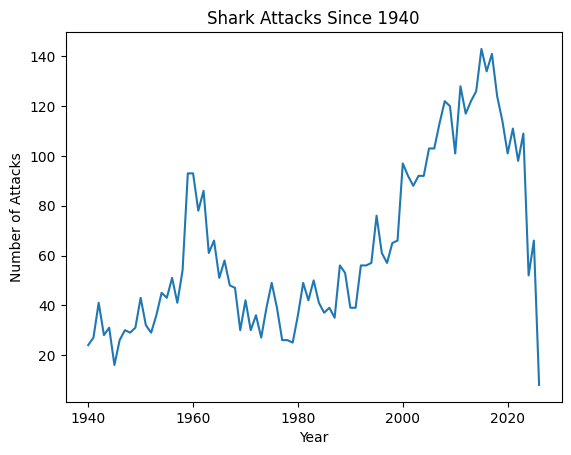

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/GSAF5.xls'

# Load the Excel file
df = pd.read_excel(file_path)

# Look at file
print(df.head())
print(df.info())

#drop empty columns
df = df.dropna(axis=1, how='all')

#clean year variable

# Convert Year to numeric, coerce errors to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

#removes values that are 0 (they are approx BC in data)
#some of the 0 values have unknown ranges
df.loc[df['Year'] == 0, 'Year'] = np.nan

df['Year_nan'] = df['Year'].isna()

print("Total missing years:", df['Year_nan'].sum())
print("Proportion missing:", df['Year_nan'].mean())

# Describe the range
print(df['Year'].describe())

# Filter to attacks since 1940
df = df[df['Year'] >= 1940]

#takes all the unique values in year and indexes them in chronoligical order
year_counts = df['Year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Shark Attacks Since 1940')
plt.show()



I cleaned the year variable by making anything that was NaN into a dummy variable as well as converting everything that was 0 into NaN and then the dummy variable. These 0 values represent ranges or BC ranges in the data set. The range of years goes from 0005 to 2026. The 0005 was a very old AD year. As far as trends go, there is a spike in attacks around 1960 and then a decrease until around 1980 when the attacks rise to the highest peak around 2010 and then attacks continually decrease to 2026.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?